In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
from shapely.geometry import Polygon
from shapely.affinity import rotate

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

# Arrows
This is based on two sets of arrows pointing in opposite directions.

We can construct it based on differencing a basic square tiles with an arrow shape, exploding the difference into polygons and assembling into a `TileUnit.elements` geodataframe.

<AxesSubplot:>

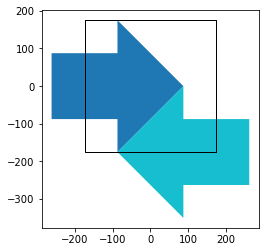

In [6]:
d = 350
arrow_tile = TileUnit(spacing = d, crs = ak.crs)
arrow1 = Polygon([(-3*d/4, -d/4), (-d/4,-d/4), (-d/4,-d/2), 
                 (d/4,0), (-d/4,d/2), (-d/4,d/4), (-3*d/4,d/4)])
arrow2 = rotate(arrow1, 180, origin = (0, -d/4))
arrow_tile.elements = geopandas.GeoDataFrame(
    data = {"element_id" : list("ab")}, crs = 2193,
    geometry = geopandas.GeoSeries([arrow1, arrow2]))
ax = arrow_tile.elements.plot(column = "element_id")
arrow_tile.tile.plot(ax = ax, facecolor = "#00000000", edgecolor = "k")

In [7]:
tiling = Tiling(arrow_tile, ak, id_var = "DZ2018")
arrows_tiling = tiling.get_tiled_map()

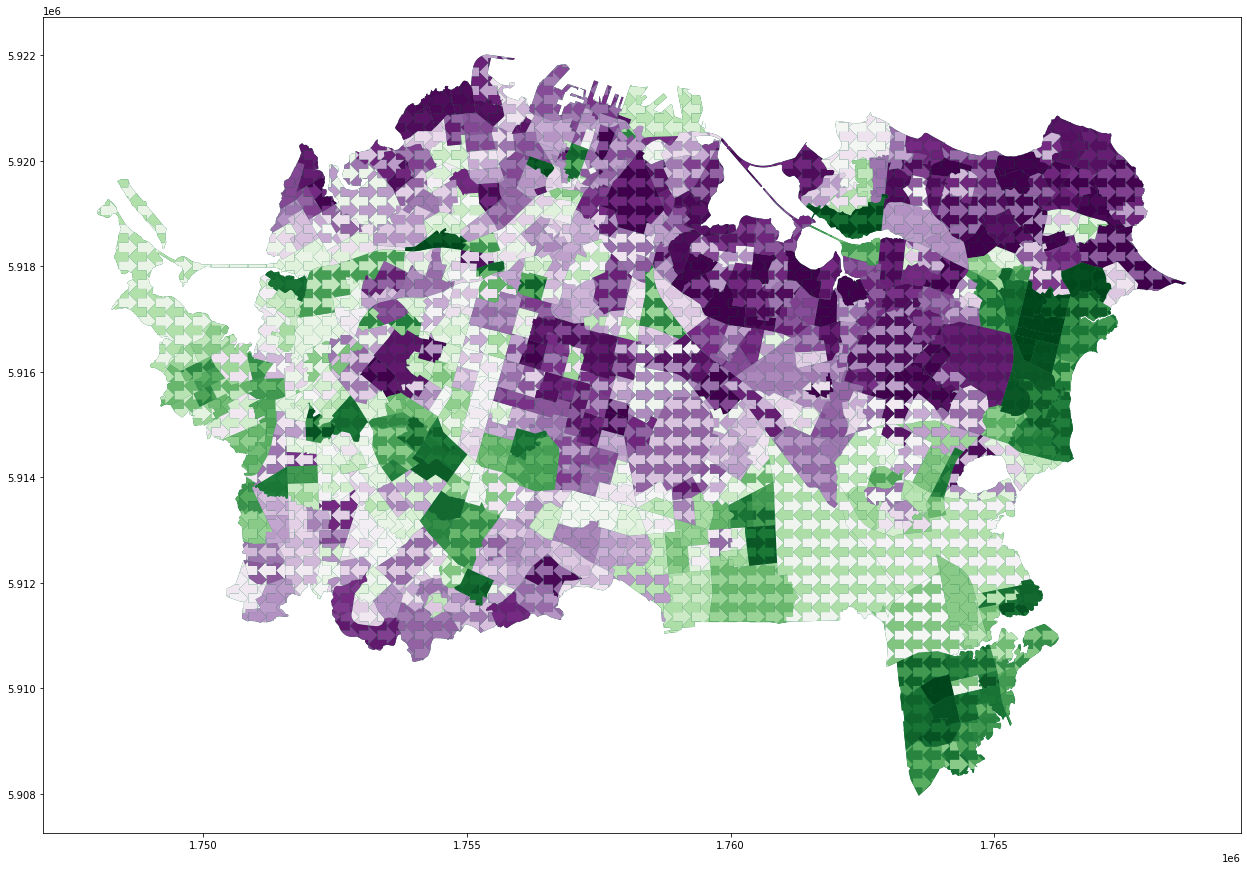

In [8]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
ak.plot(ax = ax, facecolor = "#006633", linewidth = 0)

strands = set(arrows_tiling.element_id)
cols = [x for x in arrows_tiling.columns if "Rank" in x]
cmaps = ("PRGn", "PRGn")

for strand, col, cmap in zip(strands, cols, cmaps):
    arrows_tiling[arrows_tiling.element_id == strand].plot(ax = ax, column = col, cmap = cmap, k = 100, scheme = "equal_interval", linewidth = 0)

Symbolising two correlated variables on the same colour ramp shows up areas of poor correlation well.